In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)+
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

data['MatchBreak'] = data.apply(lambda x: 'Match' if x.MatchStatus == True else 'Break', axis=1)

data['IHUB_Balance'] = data.apply(lambda x: (x.GL_Balance-0.5) if x.MatchStatus == True else x.IHUB_Balance, axis=1)

data['BalanceDiff'] = data.apply(lambda x: (x.GL_Balance-x.IHUB_Balance), axis=1)

data.to_csv('dataset.csv',index=False)

In [65]:
data = pd.read_csv("dataset.csv")
data.head(5)

,AsOfDate,Comapny,Account,AU,Currency,PrimaryAccount,SecondaryAccount,GL_Balance,IHUB_Balance,BalanceDiff,MatchBreak
0,10/25/2023,PWFHPE9S,82655541,6427,USD,Personal Loan Account,payment transaction at Reichert: Kerluke and M...,74641.83,97126.00,-22484.17,Break
1,10/16/2024,IOLVMA4VXXX,41982587,2315,CNY,Savings Account,invoice transaction at Zulauf - Morar using ca...,49589.41,49588.91,0.50,Match
2,08/01/2024,EEUGAIGR1TE,85124193,6828,USD,Personal Loan Account,withdrawal transaction at Senger - Gutmann usi...,70171.98,7083.96,63088.02,Break
3,06/12/2024,LLHODJLDXOV,3731631,7297,USD,Auto Loan Account,invoice transaction at Stoltenberg - Kilback u...,80575.51,53495.54,27079.97,Break
4,12/29/2023,YNTTQAXI,84421175,7784,BMD,Savings Account,invoice transaction at Pollich Group using car...,54501.58,96113.29,-41611.71,Break


sample=data.sample(frac=0.20)

sample.head(5)

sample['MatchBreak'] = data.apply(lambda x: 'Match' if x.MatchBreak == 'Break' else 'Break', axis=1)

In [ ]:
sample=data.filter()

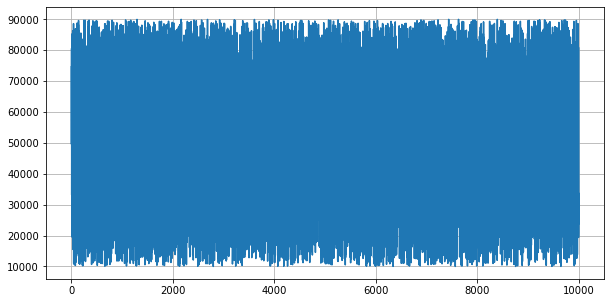

In [66]:
data['GL_Balance'].plot()
plt.grid()
plt.show()

In [67]:
data['GL_Balance'].max(),data['GL_Balance'].min()

(89999.72, 10002.71)

In [68]:
data['IHUB_Balance'].max(),data['IHUB_Balance'].min()

(98963.58, 5005.02)

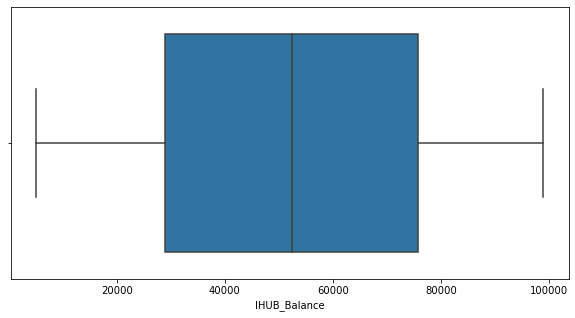

In [69]:
sns.boxplot(x=data['IHUB_Balance'])
plt.show()

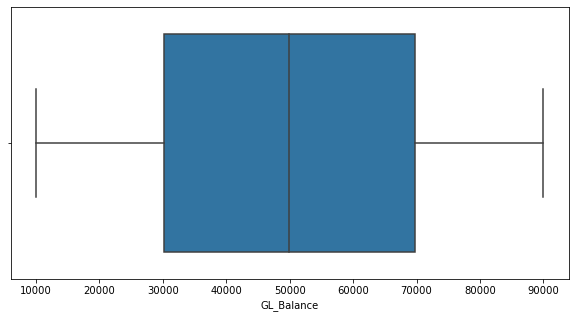

In [70]:
sns.boxplot(x=data['GL_Balance'])
plt.show()

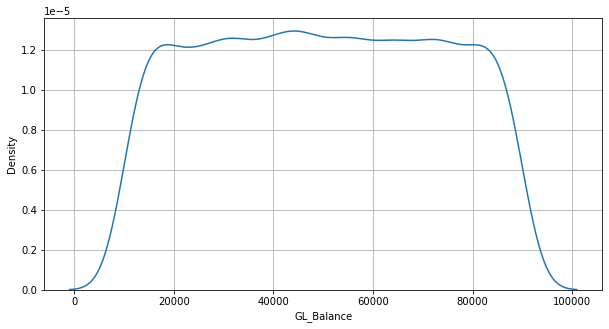

In [71]:
sns.kdeplot(x=data['GL_Balance'])

plt.grid()
plt.show()

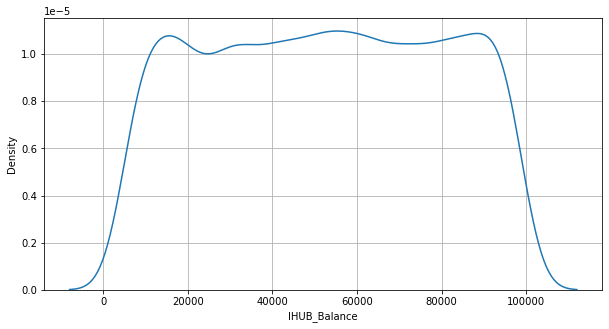

In [72]:
sns.kdeplot(x=data['IHUB_Balance'])

plt.grid()
plt.show()

In [73]:
amt=pd.Series(np.random.random_integers(0,10000,size=data.shape[0]))

#amt=pd.Series(np.random.random_integers(df['Amount'].min(),df['Amount'].max(),size=df.shape[0]))
amt

0       3877
1       8834
2       8735
3       5753
4       5471
        ... 
9995    3865
9996    4489
9997    9671
9998    2322
9999    6669
Length: 10000, dtype: int32

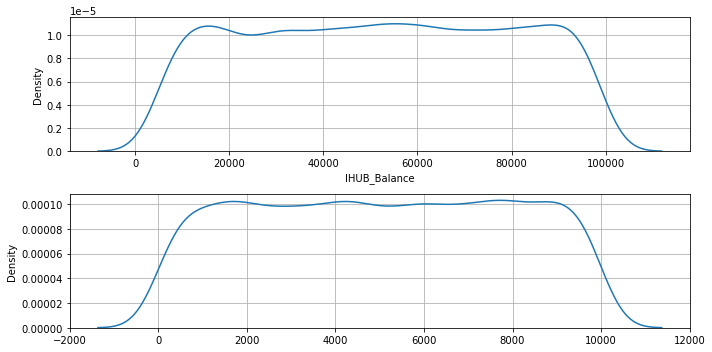

In [74]:
plt.subplot(2,1,1)
sns.kdeplot(data['IHUB_Balance'])
plt.grid()
plt.subplot(2,1,2)
sns.kdeplot(amt)
plt.grid()

plt.tight_layout()
plt.show()

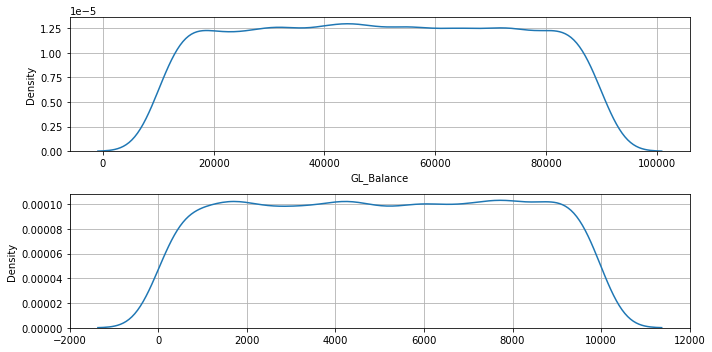

In [75]:
plt.subplot(2,1,1)
sns.kdeplot(data['GL_Balance'])
plt.grid()
plt.subplot(2,1,2)
sns.kdeplot(amt)
plt.grid()

plt.tight_layout()
plt.show()

In [76]:
q1=data['GL_Balance'].quantile(0.25)
q3=data['GL_Balance'].quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [77]:
ll

-29166.270000000022

In [78]:
ul

129215.73000000004

In [79]:
trigger_list=[]
for i in data['GL_Balance']:
    if i>ul:
        trigger_list.append("EXCEEDING")
    else:
        trigger_list.append("NOT EXCEEDING")

In [80]:
q1=data['IHUB_Balance'].quantile(0.25)
q3=data['IHUB_Balance'].quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [81]:
len(trigger_list)

10000

In [82]:
trigger_df=pd.DataFrame({'GL_Balance':data['GL_Balance'],'trigger':trigger_list})
trigger_df

,GL_Balance,trigger
0,74641.83,NOT EXCEEDING
1,49589.41,NOT EXCEEDING
2,70171.98,NOT EXCEEDING
3,80575.51,NOT EXCEEDING
4,54501.58,NOT EXCEEDING
...,...,...
9995,80936.32,NOT EXCEEDING
9996,19395.59,NOT EXCEEDING
9997,78262.90,NOT EXCEEDING
9998,20855.07,NOT EXCEEDING


In [83]:
trigger_df['trigger'].value_counts()

NOT EXCEEDING    10000
Name: trigger, dtype: int64

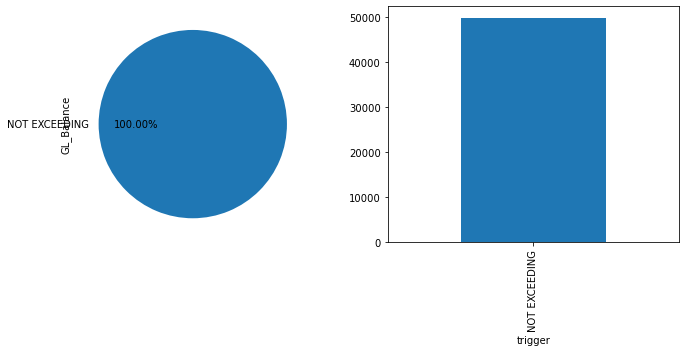

In [84]:
plt.subplot(1,2,1)
trigger_df.groupby('trigger')['GL_Balance'].mean().plot(kind='pie',autopct='%0.2f%%')
plt.subplot(1,2,2)
trigger_df.groupby('trigger')['GL_Balance'].mean().plot(kind='bar')

plt.tight_layout()
plt.show()

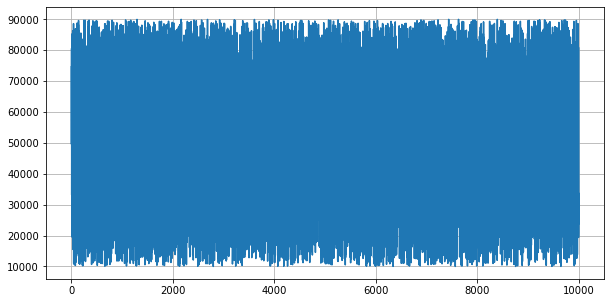

In [85]:
data['GL_Balance'].plot()
plt.grid()
plt.show()